In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
# Step 1: Read the CSV file (leaving the path empty for now)
file_path = "C:/Users/ThinkPad/Desktop/Predicting-Walmart-Demand-Using-Machine-Learning-master/dataset/merged_data_cleaned.csv"  # Update this path to the actual location of your CSV file
data = pd.read_csv(file_path)

data['Date']= pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [28]:
# Step 2: Drop the 'IsHoliday' column and define independent (X) and dependent (y) variables
X = data.drop(columns=['Weekly_Sales', 'IsHoliday'])
y = data['Weekly_Sales']


In [29]:
# Step 3: Train/test split and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))


mae = mean_absolute_error(y_test, y_pred)


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# In ra các chỉ số
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 16292.79
MAE: 12064.75
MAPE: 6359.03%


In [31]:
# Step 4: Get coefficients and associate them with column names
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient',ascending=False)


# Print the coefficients for each independent variable
print(coef_df)

        Variable  Coefficient
1           Dept    47.403550
3    Temperature    29.200654
9      MarkDown5     0.065613
2           Size     0.063095
7      MarkDown3     0.040355
6      MarkDown2     0.017076
8      MarkDown4     0.009685
5      MarkDown1    -0.000453
10           CPI   -19.734759
0          Store   -43.629744
11  Unemployment  -103.142819
4     Fuel_Price  -448.877393


In [32]:
print(X.columns)

Index(['Store', 'Dept', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')


In [33]:
# Step 4: Predict sales for Store 1 and Dept 1
store_1_dept_1 = data[(data['Store'] == 1) & (data['Dept'] == 1)]

# Prepare data for prediction (drop 'Weekly_Sales' and other irrelevant columns)
X_store_dept = store_1_dept_1.drop(columns=['Weekly_Sales', 'IsHoliday'])

In [34]:
# Predict sales for Store 1 and Dept 1
store_dept_sales_pred = model.predict(X_store_dept)

# Actual sales for Store 1 and Dept 1
store_dept_sales_actual = store_1_dept_1['Weekly_Sales']

In [35]:
import matplotlib.pyplot as plt

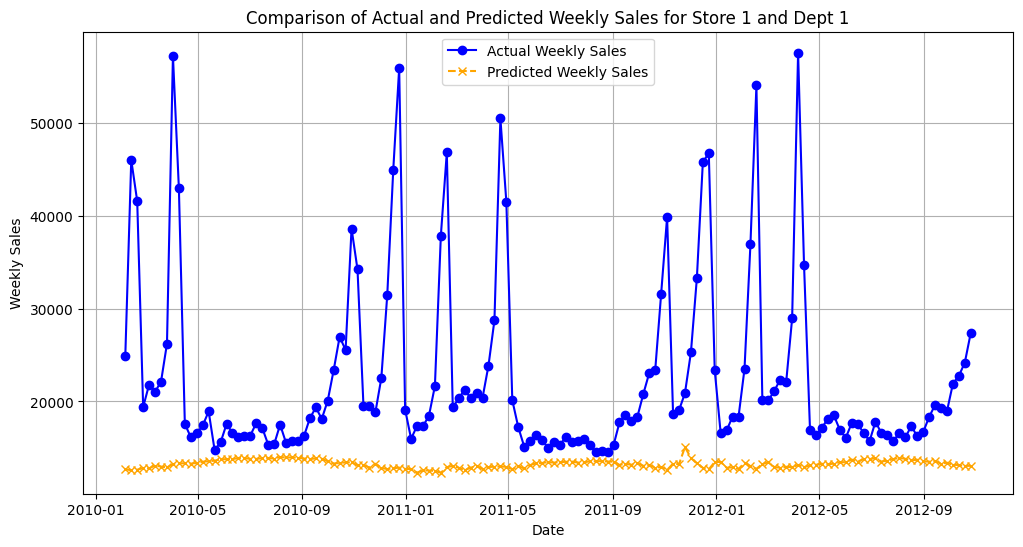

In [36]:
# Step 5: Plot actual vs predicted sales for Store 1 and Dept 1
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual and Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()

In [37]:
# Step 7: Predict next two weeks
last_date = store_1_dept_1.index.max()

# Create a list of the next two weekly dates
next_two_weeks = pd.date_range(start=last_date, periods=3, freq='W')[1:]

# Create a new DataFrame with the features for the next two weeks
new_data = pd.DataFrame({
    'Store': [1, 1],
    'Dept': [1, 1],
    'Size': [store_1_dept_1['Size'].mean(), store_1_dept_1['Size'].mean()],  # Use the mean size for predictions
    'Temperature': [60.0, 58.0],  
    'Fuel_Price': [3.5, 3.6],     
    'MarkDown1': [0.0, 0.0],
    'MarkDown2': [0.0, 0.0],
    'MarkDown3': [0.0, 0.0],
    'MarkDown4': [0.0, 0.0],
    'MarkDown5': [0.0, 0.0],
    'CPI': [211.0, 211.0],
    'Unemployment': [8.0, 8.0]
}, index=next_two_weeks)

In [38]:
# Predict sales for the next two weeks
predicted_sales_next_2_weeks = model.predict(new_data)

# Add the predicted sales to the DataFrame
new_data['Predicted_Weekly_Sales'] = predicted_sales_next_2_weeks

# Print the predicted sales for the next two weeks
print("Predicted Weekly Sales for the next 2 weeks:")
print(new_data[['Predicted_Weekly_Sales']])

Predicted Weekly Sales for the next 2 weeks:
            Predicted_Weekly_Sales
2012-11-04            12809.439598
2012-11-11            12706.150550


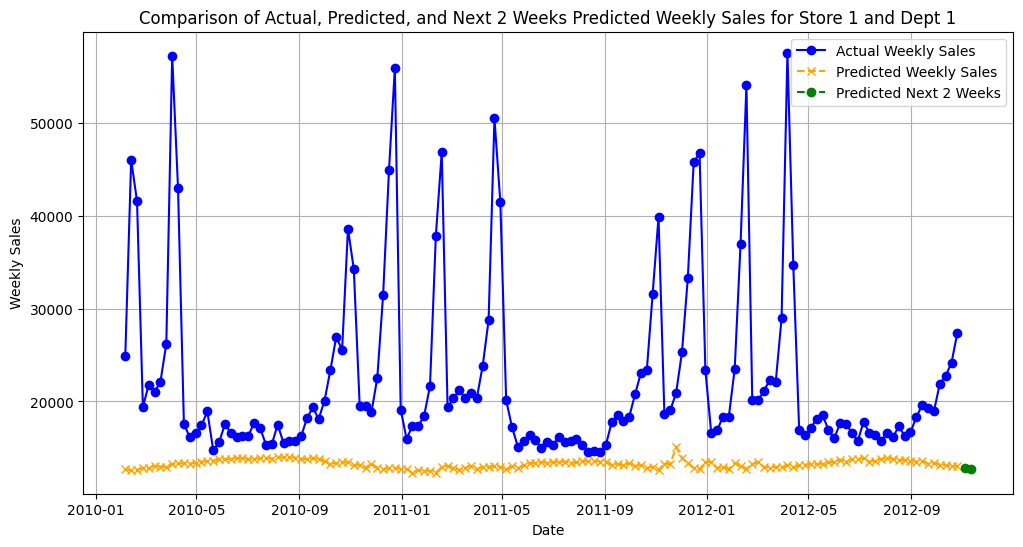

In [39]:
# Step 8: Plot predicted sales for the next two weeks
plt.figure(figsize=(12, 6))
plt.plot(store_1_dept_1.index, store_dept_sales_actual, label='Actual Weekly Sales', color='blue', marker='o', linestyle='-')
plt.plot(store_1_dept_1.index, store_dept_sales_pred, label='Predicted Weekly Sales', color='orange', marker='x', linestyle='--')
plt.plot(new_data.index, new_data['Predicted_Weekly_Sales'], label='Predicted Next 2 Weeks', color='green', marker='o', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Comparison of Actual, Predicted, and Next 2 Weeks Predicted Weekly Sales for Store 1 and Dept 1')
plt.legend()
plt.grid()
plt.show()